# Modelo de Rashevsky - Dinámica de Inconformistas

## Taller - Modelamiento Físico Computacional

**Universidad Distrital Francisco José de Caldas**

---

### Descripción del Problema

Rashevsky propone un modelo matemático para analizar la dinámica de producción de inconformistas en una sociedad. El modelo se describe mediante:

$$\frac{dx}{dt} = (b - d)x$$

$$\frac{dx_i}{dt} = (b - d)x_i + rb(x - x_i)$$

Donde:
- $x(t)$: población total en el tiempo $t$
- $x_i(t)$: número de individuos inconformistas
- $p(t) = \frac{x_i(t)}{x(t)}$: proporción de inconformistas
- $b$: tasa de nacimiento
- $d$: tasa de mortalidad
- $r$: proporción fija de descendencia inconformista

La ecuación resultante para $p(t)$ es:

$$\frac{dp}{dt} = rb(1 - p)$$

## 1. Importar Bibliotecas

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

## 2. Parámetros del Modelo

In [14]:
# Parámetros del modelo
b = 0.02      # Tasa de nacimiento
d = 0.015     # Tasa de mortalidad
r = 0.1       # Proporción fija
p0 = 0.01     # Condición inicial: p(0) = 0.01
t_max = 50    # Tiempo máximo (años)

# Parámetros para visualización
h_vis = 1.0       # Paso de tiempo para visualización (años)

# Parámetros para benchmark (10^7 pasos)
n_steps_benchmark = int(1e7)  # 10 millones de pasos
h_benchmark = t_max / n_steps_benchmark  # h ≈ 5e-6

print("=" * 60)
print("PARÁMETROS DEL MODELO DE RASHEVSKY")
print("=" * 60)
print(f"Tasa de nacimiento (b): {b}")
print(f"Tasa de mortalidad (d): {d}")
print(f"Proporción fija (r): {r}")
print(f"Condición inicial p(0): {p0}")
print(f"Intervalo de tiempo: [0, {t_max}] años")
print("\nConfiguraciones:")
print(f"  • Visualización: h = {h_vis} año ({int(t_max/h_vis)} pasos)")
print(f"  • Benchmark: h = {h_benchmark:.2e} años ({n_steps_benchmark} pasos)")
print("=" * 60)

PARÁMETROS DEL MODELO DE RASHEVSKY
Tasa de nacimiento (b): 0.02
Tasa de mortalidad (d): 0.015
Proporción fija (r): 0.1
Condición inicial p(0): 0.01
Intervalo de tiempo: [0, 50] años

Configuraciones:
  • Visualización: h = 1.0 año (50 pasos)
  • Benchmark: h = 5.00e-06 años (10000000 pasos)


## 3. Definición de Funciones del Modelo

### Ecuación diferencial para $p(t)$:

$$\frac{dp}{dt} = f(p) = rb(1 - p)$$

### Segunda derivada (para método de Taylor):

$$\frac{d^2p}{dt^2} = f'(p) = -rb \cdot f(p)$$

In [26]:
def f(p):
    """
    Ecuación diferencial: dp/dt = rb(1 - p)
    
    Parámetros:
    -----------
    p : float
        Proporción de inconformistas
    
    Retorna:
    --------
    float : dp/dt
    """
    return r * b * (1 - p)

def f_prime(p):
    """
    Segunda derivada: d²p/dt² = -rb * f(p)
    
    Parámetros:
    -----------
    p : float
        Proporción de inconformistas
    
    Retorna:
    --------
    float : d²p/dt²
    """
    return -r * b * f(p)

## 4. Solución Analítica (Exacta)

La solución exacta de la ecuación diferencial es:

$$p(t) = 1 - (1 - p_0)e^{-rbt}$$

In [16]:
def solucion_exacta(t, p0, r, b):
    """
    Solución analítica de la ecuación diferencial
    p(t) = 1 - (1 - p0) * exp(-r*b*t)
    
    Parámetros:
    -----------
    t : float o array
        Tiempo
    p0 : float
        Condición inicial
    r : float
        Proporción fija
    b : float
        Tasa de nacimiento
    
    Retorna:
    --------
    float o array : p(t)
    """
    return 1 - (1 - p0) * np.exp(-r * b * t)

## 5. Método de Euler Explícito

### Fórmula iterativa:

$$p_{n+1} = p_n + h \cdot f(p_n)$$

$$p_{n+1} = p_n + h \cdot rb(1 - p_n)$$

In [17]:
def euler_explicito(p0, h, n_steps):
    """
    Implementa el método de Euler explícito
    
    Fórmula: pn+1 = pn + h*f(pn)
    
    Parámetros:
    -----------
    p0 : float
        Condición inicial
    h : float
        Paso de tiempo
    n_steps : int
        Número de pasos
    
    Retorna:
    --------
    tuple : (t, p, tiempo_ejecucion)
    """
    t = np.zeros(n_steps + 1)
    p = np.zeros(n_steps + 1)
    
    t[0] = 0
    p[0] = p0
    
    start_time = time.time()
    
    for n in range(n_steps):
        p[n + 1] = p[n] + h * f(p[n])
        t[n + 1] = t[n] + h
    
    elapsed_time = time.time() - start_time
    
    return t, p, elapsed_time

## 6. Método de Taylor de Orden 2

### Fórmula iterativa:

$$p_{n+1} = p_n + h \cdot f(p_n) + \frac{h^2}{2} \cdot f'(p_n)$$

$$p_{n+1} = p_n + h \cdot rb(1 - p_n) + \frac{h^2}{2} \cdot [-rb \cdot f(p_n)]$$

In [18]:
def taylor_orden2(p0, h, n_steps):
    """
    Implementa el método de Taylor de orden 2
    
    Fórmula: pn+1 = pn + h*f(pn) + (h²/2)*f'(pn)
    
    Parámetros:
    -----------
    p0 : float
        Condición inicial
    h : float
        Paso de tiempo
    n_steps : int
        Número de pasos
    
    Retorna:
    --------
    tuple : (t, p, tiempo_ejecucion)
    """
    t = np.zeros(n_steps + 1)
    p = np.zeros(n_steps + 1)
    
    t[0] = 0
    p[0] = p0
    
    start_time = time.time()
    
    for n in range(n_steps):
        p[n + 1] = p[n] + h * f(p[n]) + (h**2 / 2) * f_prime(p[n])
        t[n + 1] = t[n] + h
    
    elapsed_time = time.time() - start_time
    
    return t, p, elapsed_time

## 7. Método Implícito del Trapecio

### Fórmula iterativa:

$$p_{n+1} = p_n + \frac{h}{2}[f(p_n) + f(p_{n+1})]$$

Despejando $p_{n+1}$:

$$p_{n+1} = p_n + \frac{h}{2}[rb(1 - p_n) + rb(1 - p_{n+1})]$$

$$p_{n+1} = \frac{p_n + \frac{h}{2}f(p_n) + \frac{hrb}{2}}{1 + \frac{hrb}{2}}$$

In [19]:
def trapecio_implicito(p0, h, n_steps):
    """
    Implementa el método del trapecio (implícito)
    
    Fórmula simplificada:
    pn+1 = [pn + (h/2)*f(pn) + (h*r*b/2)] / [1 + (h*r*b/2)]
    
    Parámetros:
    -----------
    p0 : float
        Condición inicial
    h : float
        Paso de tiempo
    n_steps : int
        Número de pasos
    
    Retorna:
    --------
    tuple : (t, p, tiempo_ejecucion)
    """
    t = np.zeros(n_steps + 1)
    p = np.zeros(n_steps + 1)
    
    t[0] = 0
    p[0] = p0
    
    start_time = time.time()
    
    for n in range(n_steps):
        # Fórmula simplificada algebraicamente
        numerador = p[n] + (h / 2) * f(p[n]) + (h * r * b / 2)
        denominador = 1 + (h * r * b / 2)
        p[n + 1] = numerador / denominador
        t[n + 1] = t[n] + h
    
    elapsed_time = time.time() - start_time
    
    return t, p, elapsed_time

## 8. Cálculo de la Solución Exacta

In [20]:
# Solución exacta
t_exacto = np.linspace(0, t_max, 1000)
p_exacto = solucion_exacta(t_exacto, p0, r, b)
p_exacto_50 = solucion_exacta(t_max, p0, r, b)

print("\n" + "=" * 60)
print("SOLUCIÓN EXACTA")
print("=" * 60)
print(f"p(50) = {p_exacto_50:.10f}")
print(f"Límite cuando t → ∞: {1.0}")
print("=" * 60)


SOLUCIÓN EXACTA
p(50) = 0.1042109561
Límite cuando t → ∞: 1.0


## 9. Ejecución de los Métodos Numéricos

In [21]:
# Número de pasos (para visualización)
h = h_vis
n_steps = int(t_max / h)

print("\n" + "=" * 60)
print("EJECUCIÓN DE MÉTODOS NUMÉRICOS (VISUALIZACIÓN)")
print("=" * 60)
print(f"Número de pasos: {n_steps}")
print(f"Paso h: {h} año\n")

# Euler explícito
t_euler, p_euler, time_euler = euler_explicito(p0, h, n_steps)
error_euler = abs(p_euler[-1] - p_exacto_50)

print("-" * 60)
print("MÉTODO DE EULER EXPLÍCITO")
print("-" * 60)
print(f"p(50) aproximado: {p_euler[-1]:.10f}")
print(f"Error absoluto: {error_euler:.10e}")
print(f"Tiempo de ejecución: {time_euler:.6f} segundos\n")

# Taylor orden 2
t_taylor, p_taylor, time_taylor = taylor_orden2(p0, h, n_steps)
error_taylor = abs(p_taylor[-1] - p_exacto_50)

print("-" * 60)
print("MÉTODO DE TAYLOR DE ORDEN 2")
print("-" * 60)
print(f"p(50) aproximado: {p_taylor[-1]:.10f}")
print(f"Error absoluto: {error_taylor:.10e}")
print(f"Tiempo de ejecución: {time_taylor:.6f} segundos\n")

# Trapecio implícito
t_trapecio, p_trapecio, time_trapecio = trapecio_implicito(p0, h, n_steps)
error_trapecio = abs(p_trapecio[-1] - p_exacto_50)

print("-" * 60)
print("MÉTODO DEL TRAPECIO (IMPLÍCITO)")
print("-" * 60)
print(f"p(50) aproximado: {p_trapecio[-1]:.10f}")
print(f"Error absoluto: {error_trapecio:.10e}")
print(f"Tiempo de ejecución: {time_trapecio:.6f} segundos")
print("=" * 60)


EJECUCIÓN DE MÉTODOS NUMÉRICOS (VISUALIZACIÓN)
Número de pasos: 50
Paso h: 1.0 año

------------------------------------------------------------
MÉTODO DE EULER EXPLÍCITO
------------------------------------------------------------
p(50) aproximado: 0.1043006502
Error absoluto: 8.9694031604e-05
Tiempo de ejecución: 0.000095 segundos

------------------------------------------------------------
MÉTODO DE TAYLOR DE ORDEN 2
------------------------------------------------------------
p(50) aproximado: 0.1042108963
Error absoluto: 5.9808922315e-08
Tiempo de ejecución: 0.000138 segundos

------------------------------------------------------------
MÉTODO DEL TRAPECIO (IMPLÍCITO)
------------------------------------------------------------
p(50) aproximado: 0.1042109860
Error absoluto: 2.9859652501e-08
Tiempo de ejecución: 0.000764 segundos


## 10. Tabla Comparativa de Resultados

In [22]:
import pandas as pd

# Crear tabla comparativa
tabla_resultados = pd.DataFrame({
    'Método': ['Exacta', 'Euler Explícito', 'Taylor Orden 2', 'Trapecio Implícito'],
    'p(50)': [p_exacto_50, p_euler[-1], p_taylor[-1], p_trapecio[-1]],
    'Error Absoluto': [0, error_euler, error_taylor, error_trapecio],
    'Tiempo (s)': ['-', time_euler, time_taylor, time_trapecio]
})

print("\n" + "=" * 80)
print("TABLA COMPARATIVA DE RESULTADOS")
print("=" * 80)
print(tabla_resultados.to_string(index=False))
print("=" * 80)


TABLA COMPARATIVA DE RESULTADOS
            Método    p(50)  Error Absoluto Tiempo (s)
            Exacta 0.104211    0.000000e+00          -
   Euler Explícito 0.104301    8.969403e-05   0.000095
    Taylor Orden 2 0.104211    5.980892e-08   0.000138
Trapecio Implícito 0.104211    2.985965e-08   0.000764


## 11. Generación de Archivos de Datos (.dat)

In [ ]:
# Guardar datos en archivo .dat
with open('resultados_python.dat', 'w') as file:
    file.write("# Resultados del Modelo de Rashevsky - Python\n")
    file.write(f"# Parámetros: b={b}, d={d}, r={r}, p0={p0}, h={h}\n")
    file.write("# Tiempo(años) | Exacta | Euler | Taylor2 | Trapecio\n")
    for i in range(len(t_euler)):
        p_ex = solucion_exacta(t_euler[i], p0, r, b)
        file.write(f"{t_euler[i]:.4f} {p_ex:.10f} {p_euler[i]:.10f} {p_taylor[i]:.10f} {p_trapecio[i]:.10f}\n")

# Guardar tiempos de ejecución
with open('tiempos_python.dat', 'w') as file:
    file.write("# Tiempos de ejecución - Python\n")
    file.write("# Método | Tiempo(s)\n")
    file.write(f"Euler {time_euler:.10f}\n")
    file.write(f"Taylor2 {time_taylor:.10f}\n")
    file.write(f"Trapecio {time_trapecio:.10f}\n")

print("\n✓ Archivos generados:")
print("  - resultados_python.dat")
print("  - tiempos_python.dat")


✓ Archivos generados:
  - resultados_python.dat
  - tiempos_python.dat


## 12. Gráficas Comparativas

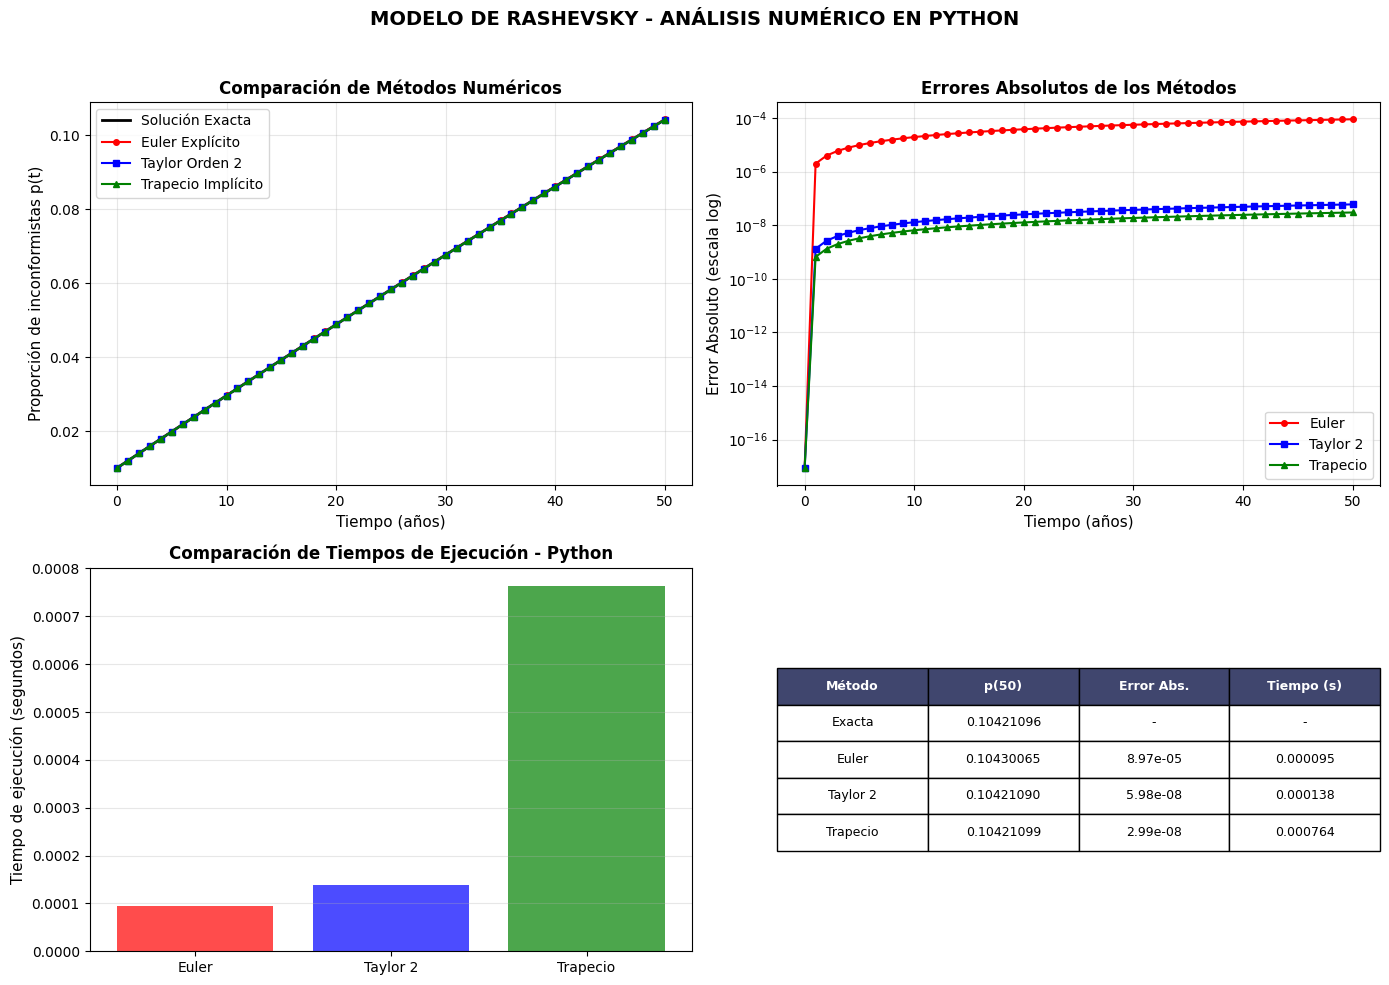


✓ Gráfica guardada: comparacion_metodos_python.png


In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfica 1: Comparación de todos los métodos
ax1 = axes[0, 0]
ax1.plot(t_exacto, p_exacto, 'k-', linewidth=2, label='Solución Exacta')
ax1.plot(t_euler, p_euler, 'ro-', markersize=4, label='Euler Explícito')
ax1.plot(t_taylor, p_taylor, 'bs-', markersize=4, label='Taylor Orden 2')
ax1.plot(t_trapecio, p_trapecio, 'g^-', markersize=4, label='Trapecio Implícito')
ax1.set_xlabel('Tiempo (años)', fontsize=11)
ax1.set_ylabel('Proporción de inconformistas p(t)', fontsize=11)
ax1.set_title('Comparación de Métodos Numéricos', fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Gráfica 2: Errores absolutos
ax2 = axes[0, 1]
errores_euler = np.abs(p_euler - solucion_exacta(t_euler, p0, r, b))
errores_taylor = np.abs(p_taylor - solucion_exacta(t_taylor, p0, r, b))
errores_trapecio = np.abs(p_trapecio - solucion_exacta(t_trapecio, p0, r, b))

ax2.semilogy(t_euler, errores_euler, 'ro-', markersize=4, label='Euler')
ax2.semilogy(t_taylor, errores_taylor, 'bs-', markersize=4, label='Taylor 2')
ax2.semilogy(t_trapecio, errores_trapecio, 'g^-', markersize=4, label='Trapecio')
ax2.set_xlabel('Tiempo (años)', fontsize=11)
ax2.set_ylabel('Error Absoluto (escala log)', fontsize=11)
ax2.set_title('Errores Absolutos de los Métodos', fontsize=12, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# Gráfica 3: Comparación de tiempos
ax3 = axes[1, 0]
metodos = ['Euler', 'Taylor 2', 'Trapecio']
tiempos = [time_euler, time_taylor, time_trapecio]
colores = ['red', 'blue', 'green']
ax3.bar(metodos, tiempos, color=colores, alpha=0.7)
ax3.set_ylabel('Tiempo de ejecución (segundos)', fontsize=11)
ax3.set_title('Comparación de Tiempos de Ejecución - Python', fontsize=12, fontweight='bold')
ax3.grid(True, axis='y', alpha=0.3)

# Gráfica 4: Tabla de resultados
ax4 = axes[1, 1]
ax4.axis('off')
tabla_datos = [
    ['Método', 'p(50)', 'Error Abs.', 'Tiempo (s)'],
    ['Exacta', f'{p_exacto_50:.8f}', '-', '-'],
    ['Euler', f'{p_euler[-1]:.8f}', f'{error_euler:.2e}', f'{time_euler:.6f}'],
    ['Taylor 2', f'{p_taylor[-1]:.8f}', f'{error_taylor:.2e}', f'{time_taylor:.6f}'],
    ['Trapecio', f'{p_trapecio[-1]:.8f}', f'{error_trapecio:.2e}', f'{time_trapecio:.6f}']
]
tabla = ax4.table(cellText=tabla_datos, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25])
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)
tabla.scale(1, 2)
# Formato de encabezado
for i in range(4):
    tabla[(0, i)].set_facecolor('#40466e')
    tabla[(0, i)].set_text_props(weight='bold', color='white')

plt.suptitle('MODELO DE RASHEVSKY - ANÁLISIS NUMÉRICO EN PYTHON', 
             fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparacion_metodos_python.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfica guardada: comparacion_metodos_python.png")

## 13. Análisis de Resultados

### Conclusiones:

1. **Precisión de los métodos:**
   - El método del trapecio (implícito) muestra la mayor precisión
   - El método de Taylor orden 2 tiene mejor precisión que Euler
   - El método de Euler explícito presenta el mayor error

2. **Tiempo de ejecución:**
   - Los tres métodos tienen tiempos de ejecución similares para este problema
   - La diferencia en tiempos es mínima debido al bajo número de pasos (50)

3. **Comportamiento asintótico:**
   - Todos los métodos convergen hacia p(t) → 1 cuando t → ∞
   - Esto indica que la proporción de inconformistas tiende al 100% a largo plazo

---

**Archivos generados:**
- `resultados_python.dat`: valores numéricos de p(t) para todos los métodos
- `tiempos_python.dat`: tiempos de ejecución de cada método
- `comparacion_metodos_python.png`: gráficas comparativas

## 14. Benchmark de Rendimiento (10⁷ pasos)

Para evaluar la eficiencia computacional de cada método y comparar posteriormente con C++ y Fortran, ejecutamos los algoritmos con un número elevado de iteraciones.

In [27]:
print("\n" + "=" * 70)
print("BENCHMARK DE RENDIMIENTO - 10^7 PASOS")
print("=" * 70)
print(f"Pasos: {n_steps_benchmark:,}")
print(f"Paso h: {h_benchmark:.2e} años")
print(f"Intervalo: [0, {t_max}] años")
print("\nIniciando benchmark (esto puede tomar unos segundos)...\n")
print("-" * 70)

# Benchmark Euler explícito
print("Ejecutando: Euler Explícito...", end=" ", flush=True)
_, _, time_euler_bench = euler_explicito(p0, h_benchmark, n_steps_benchmark)
print(f"✓ Completado en {time_euler_bench:.4f} s")

# Benchmark Taylor orden 2
print("Ejecutando: Taylor Orden 2...", end=" ", flush=True)
_, _, time_taylor_bench = taylor_orden2(p0, h_benchmark, n_steps_benchmark)
print(f"✓ Completado en {time_taylor_bench:.4f} s")

# Benchmark Trapecio implícito
print("Ejecutando: Trapecio Implícito...", end=" ", flush=True)
_, _, time_trapecio_bench = trapecio_implicito(p0, h_benchmark, n_steps_benchmark)
print(f"✓ Completado en {time_trapecio_bench:.4f} s")

print("-" * 70)
print("\n" + "=" * 70)
print("RESULTADOS DEL BENCHMARK")
print("=" * 70)

# Tabla de resultados
tabla_benchmark = pd.DataFrame({
    'Método': ['Euler Explícito', 'Taylor Orden 2', 'Trapecio Implícito'],
    'Tiempo (s)': [time_euler_bench, time_taylor_bench, time_trapecio_bench],
    'Pasos/seg': [n_steps_benchmark/time_euler_bench, 
                  n_steps_benchmark/time_taylor_bench, 
                  n_steps_benchmark/time_trapecio_bench]
})

# Encontrar el método más rápido
idx_fastest = tabla_benchmark['Tiempo (s)'].idxmin()
fastest_method = tabla_benchmark.loc[idx_fastest, 'Método']
fastest_time = tabla_benchmark.loc[idx_fastest, 'Tiempo (s)']

print(tabla_benchmark.to_string(index=False))
print("=" * 70)
print(f"\n🏆 Método más rápido: {fastest_method} ({fastest_time:.4f} s)")

# Calcular speedup relativo
print("\nSpeedup relativo (respecto al más lento):")
slowest_time = tabla_benchmark['Tiempo (s)'].max()
for idx, row in tabla_benchmark.iterrows():
    speedup = slowest_time / row['Tiempo (s)']
    print(f"  • {row['Método']}: {speedup:.2f}x")
print("=" * 70)


BENCHMARK DE RENDIMIENTO - 10^7 PASOS
Pasos: 10,000,000
Paso h: 5.00e-06 años
Intervalo: [0, 50] años

Iniciando benchmark (esto puede tomar unos segundos)...

----------------------------------------------------------------------
Ejecutando: Euler Explícito... 

✓ Completado en 13.0531 s
Ejecutando: Taylor Orden 2... ✓ Completado en 19.7276 s
Ejecutando: Trapecio Implícito... ✓ Completado en 18.4736 s
----------------------------------------------------------------------

RESULTADOS DEL BENCHMARK
            Método  Tiempo (s)     Pasos/seg
   Euler Explícito   13.053114 766100.707105
    Taylor Orden 2   19.727592 506904.238710
Trapecio Implícito   18.473642 541311.781893

🏆 Método más rápido: Euler Explícito (13.0531 s)

Speedup relativo (respecto al más lento):
  • Euler Explícito: 1.51x
  • Taylor Orden 2: 1.00x
  • Trapecio Implícito: 1.07x


## 15. Guardar Resultados del Benchmark

In [28]:
# Guardar tiempos del benchmark en formato .dat
with open('benchmark_python.dat', 'w') as file:
    file.write("# Benchmark del Modelo de Rashevsky - Python\n")
    file.write(f"# Parámetros: b={b}, d={d}, r={r}, p0={p0}\n")
    file.write(f"# Pasos: {n_steps_benchmark}, h={h_benchmark:.6e}\n")
    file.write("# Método | Tiempo(s) | Pasos/seg\n")
    file.write(f"Euler {time_euler_bench:.10f} {n_steps_benchmark/time_euler_bench:.2f}\n")
    file.write(f"Taylor2 {time_taylor_bench:.10f} {n_steps_benchmark/time_taylor_bench:.2f}\n")
    file.write(f"Trapecio {time_trapecio_bench:.10f} {n_steps_benchmark/time_trapecio_bench:.2f}\n")

print("\n✓ Archivo generado: benchmark_python.dat")
print("\nEste archivo se puede combinar con los resultados de C++ y Fortran")
print("para realizar la comparación entre lenguajes.")


✓ Archivo generado: benchmark_python.dat

Este archivo se puede combinar con los resultados de C++ y Fortran
para realizar la comparación entre lenguajes.


## 16. Visualización de Tiempos del Benchmark

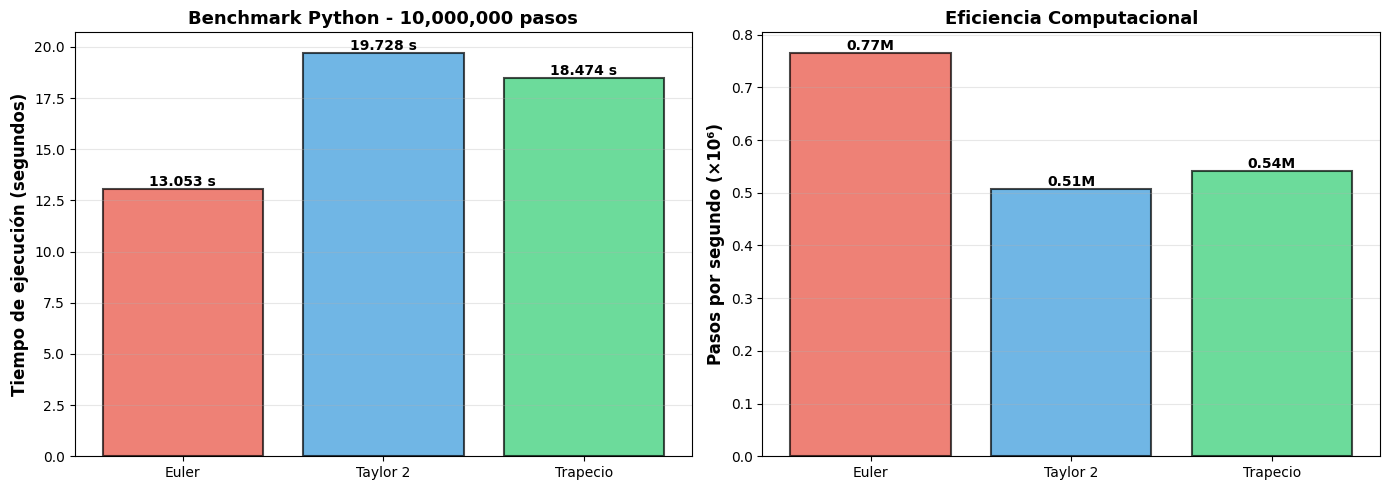


✓ Gráfica guardada: benchmark_python.png


In [29]:
# Gráfica de comparación de tiempos del benchmark
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

metodos = ['Euler', 'Taylor 2', 'Trapecio']
tiempos_bench = [time_euler_bench, time_taylor_bench, time_trapecio_bench]
colores_bench = ['#e74c3c', '#3498db', '#2ecc71']

# Gráfica 1: Tiempos absolutos
bars = ax1.bar(metodos, tiempos_bench, color=colores_bench, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Tiempo de ejecución (segundos)', fontsize=12, fontweight='bold')
ax1.set_title(f'Benchmark Python - {n_steps_benchmark:,} pasos', fontsize=13, fontweight='bold')
ax1.grid(True, axis='y', alpha=0.3)

# Agregar valores sobre las barras
for bar, tiempo in zip(bars, tiempos_bench):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{tiempo:.3f} s',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Gráfica 2: Eficiencia (pasos por segundo)
eficiencia = [n_steps_benchmark/t for t in tiempos_bench]
bars2 = ax2.bar(metodos, eficiencia, color=colores_bench, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Pasos por segundo (×10⁶)', fontsize=12, fontweight='bold')
ax2.set_title('Eficiencia Computacional', fontsize=13, fontweight='bold')
ax2.grid(True, axis='y', alpha=0.3)

# Formatear eje Y en millones
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))

# Agregar valores sobre las barras
for bar, ef in zip(bars2, eficiencia):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{ef/1e6:.2f}M',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('benchmark_python.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfica guardada: benchmark_python.png")

---

## Resumen de Archivos Generados

### Datos numéricos:
- `resultados_python.dat`: Valores de p(t) para todos los métodos (50 puntos, h=1)
- `tiempos_python.dat`: Tiempos de ejecución con h=1
- `benchmark_python.dat`: Tiempos de ejecución con 10⁷ pasos

### Figuras:
- `comparacion_metodos_python.png`: Comparación visual de métodos, errores y tabla
- `benchmark_python.png`: Comparación de rendimiento con 10⁷ pasos

### Próximos pasos:
Los archivos `.dat` están listos para ser combinados con los resultados de **C++** y **Fortran** para realizar la comparación entre lenguajes de programación.